In [2]:
import tensorflow as tf
import keras
import numpy as np
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

In [ ]:
img_rows, img_cols = 224, 224

data_path = "./Dataset/"

x, y = [], []

counter = 0

classes = os.listdir(data_path)

#load the dataset
for class_path in os.listdir(data_path):
    for img_path in os.listdir(f"{data_path}{class_path}"):
        path = f"{data_path}{class_path}/{img_path}"
        label = counter
        image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols), color_mode="grayscale")
        #kasih color mode jika disuruh imagenya gray scale
        image = tf.keras.preprocessing.image.img_to_array(image)
        
        x.append(image)
        y.append(label)
        
    counter += 1
    
x=np.array(x)
y=np.array(y)

#harus shuffle
    

In [6]:
#normalisasi
x = x.astype("float32") / 255.0

#split 80:10:10
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#one hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=4)
y_val = keras.utils.to_categorical(y_val, num_classes=4)
y_test = keras.utils.to_categorical(y_test, num_classes=4)

In [7]:
#model
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), activation="relu", input_shape=(img_rows, img_cols, 1)))
#shape 1 krn gray scale, sesuaiin sama warna gambar
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Conv2D(16, (5,5), activation="relu")) #biasanya makin banyak
model.add(keras.layers.Conv2D(16, (5,5), activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(4, activation='softmax')) #sesuaiin dgn jumlah class kalian
model.summary()


c:\Anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 6)    │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 102, 102, 16)   │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 51, 51, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     4,994,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           484 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,003,512 (19.09 MB)

 Trainable params: 5,003,512 (19.09 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [10]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
history=model.fit(X_train, y_train, batch_size=120, validation_data=(X_val, y_val), epochs=10)

score = model.evaluate(X_test, y_test)
print(f"test loss: {score[0]}")
print(f"test accuracy: {score[1]}")

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 463ms/step - accuracy: 0.3016 - loss: 1.4227 - val_accuracy: 0.3200 - val_loss: 1.1638
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step - accuracy: 0.4268 - loss: 1.1036 - val_accuracy: 0.7400 - val_loss: 0.7250
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.7733 - loss: 0.6100 - val_accuracy: 0.8600 - val_loss: 0.4338
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - accuracy: 0.8607 - loss: 0.3780 - val_accuracy: 0.8150 - val_loss: 0.4954
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.8933 - loss: 0.2991 - val_accuracy: 0.8800 - val_loss: 0.3669
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.9121 - loss: 0.2102 - val_accuracy: 0.8900 - val_loss: 0.3305
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.9469 - loss: 0.1488 - val_accuracy: 0.8700 - val_loss: 0.4577
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.9616 - loss: 0.1215 - val_accuracy: 0.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


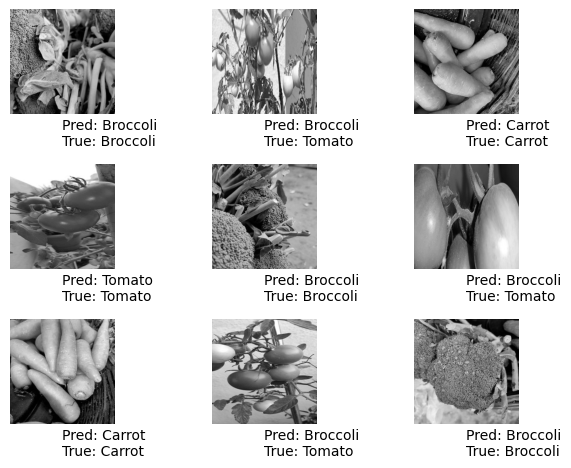

In [14]:
predictions = model.predict(X_test)
true_labels = np.argmax(y_test, axis=1)
predict_label = np.argmax(predictions, axis=1)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.text(0.5, -0.15, f"Pred: {classes[predict_label[i]]}", transform=plt.gca().transAxes)
    plt.text(0.5, -0.3, f"True: {classes[true_labels[i]]}", transform=plt.gca().transAxes)
    
plt.tight_layout() #biar textnya yg true ga nutup foto dibawahnya
plt.show()

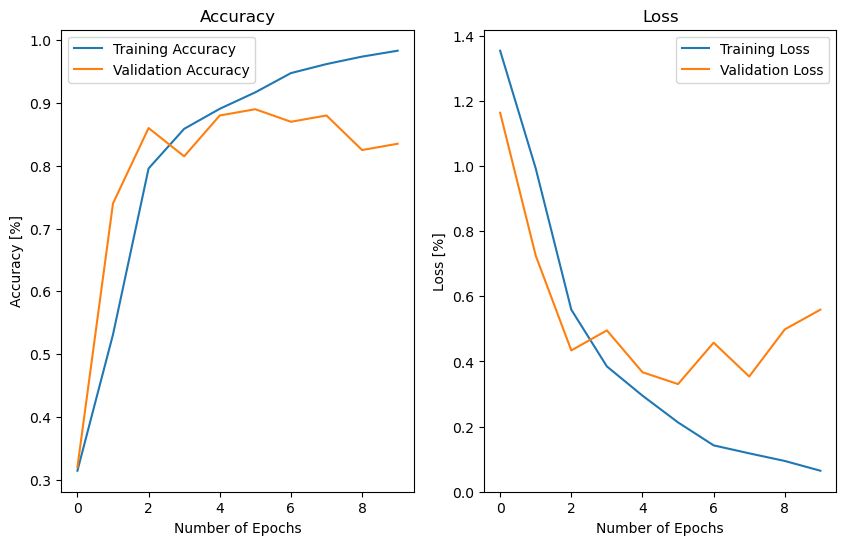

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy [%]")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss [%]")
plt.title("Loss")
plt.legend()